In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
from os.path import join
%matplotlib inline

In [151]:
from keras.models import load_model

Using TensorFlow backend.


In [153]:
nr_pos = load_model("/glade/p/cisl/aiml/dgagne/cam_run5_models_20190726/dnn_nr_pos.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [154]:
nr_pos.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 11)                0         
_________________________________________________________________
dense_00 (Dense)             (None, 60)                720       
_________________________________________________________________
dense_01 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_02 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_03 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_04 (Dense)             (None, 1)                 61        
Total params: 11,761
Trainable params: 11,761
Non-trainable params: 0
_______________________________________________________

In [152]:
ls -lh /glade/p/cisl/aiml/dgagne/cam_run5_models_20190726/

total 50G
-rw-r--r-- 1 dgagne naml0001  231 Jul 30 12:49 dnn_classifier_scores.csv
-rw-r--r-- 1 dgagne naml0001 178K Jul 30 10:46 dnn_nc_class.h5
-rw-r--r-- 1 dgagne naml0001  66K Jul 30 10:46 dnn_nc_class_fortran.nc
-rw-r--r-- 1 dgagne naml0001 178K Jul 30 11:30 dnn_nc_pos.h5
-rw-r--r-- 1 dgagne naml0001  66K Jul 30 11:30 dnn_nc_pos_fortran.nc
-rw-r--r-- 1 dgagne naml0001 179K Jul 30 12:15 dnn_nr_class.h5
-rw-r--r-- 1 dgagne naml0001  66K Jul 30 12:15 dnn_nr_class_fortran.nc
-rw-r--r-- 1 dgagne naml0001 178K Jul 30 12:43 dnn_nr_neg.h5
-rw-r--r-- 1 dgagne naml0001  66K Jul 30 12:43 dnn_nr_neg_fortran.nc
-rw-r--r-- 1 dgagne naml0001 178K Jul 30 12:48 dnn_nr_pos.h5
-rw-r--r-- 1 dgagne naml0001  66K Jul 30 12:48 dnn_nr_pos_fortran.nc
-rw-r--r-- 1 dgagne naml0001 178K Jul 30 09:20 dnn_qr_class.h5
-rw-r--r-- 1 dgagne naml0001  66K Jul 30 09:20 dnn_qr_class_fortran.nc
-rw-r--r-- 1 dgagne naml0001 178K Jul 30 10:00 dnn_qr_pos.h5
-rw-r--r-- 1 dgagne naml0001  66K Jul 30 10:00 dnn_qr_pos_fortra

In [27]:
ml_path = "/glade/p/cisl/aiml/dgagne/TAU_ML_v2"
cam_path = "/glade/p/cisl/aiml/dgagne/TAU_run5_full/"
ds = xr.open_mfdataset(join(ml_path, "TAU_ML_v2.cam.h0.*.nc"))
ds_cam = xr.open_mfdataset(join(cam_path, "TAU_run5.cam.h0.*.nc"))

In [10]:
ds

<xarray.Dataset>
Dimensions:           (ilev: 33, lat: 192, lev: 32, lon: 288, nbnd: 2, time: 1)
Coordinates:
  * lat               (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon               (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lev               (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev              (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time              (time) object 0001-02-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    gw                (lat) float64 ...
    hyam              (lev) float64 ...
    hybm              (lev) float64 ...
    P0                float64 ...
    hyai              (ilev) float64 ...
    hybi              (ilev) float64 ...
    date              (time) int32 ...
    datesec           (time) int32 ...
    time_bnds         (time, nbnd) object ...
    date_written      (time) |S8 ...
    time_written      (time) |S8 ...
    ndbase            int32 ...
    nsbas

(array([ 10278.,  13898.,  25339.,  47598.,  76145., 107207., 142907.,
        177663., 241280., 484789.]),
 array([0.        , 0.09999599, 0.19999197, 0.29998794, 0.39998394,
        0.4999799 , 0.5999759 , 0.69997185, 0.7999679 , 0.89996386,
        0.9999598 ], dtype=float32),
 <a list of 1 Patch objects>)

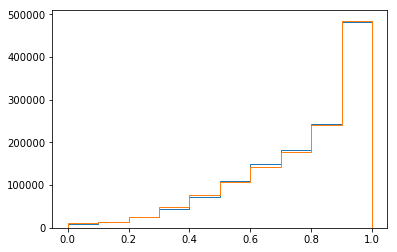

In [62]:
plt.hist(ds["CLDTOT"].values.ravel(), histtype="step")
plt.hist(ds_cam["CLDTOT"].values.ravel(), histtype="step")

(array([7097., 7029., 4519., 3904., 4278., 4325., 3728., 4369., 7187.,
        8860.]),
 array([0.        , 0.09986578, 0.19973156, 0.29959732, 0.39946312,
        0.49932888, 0.59919465, 0.69906044, 0.79892623, 0.89879197,
        0.99865776], dtype=float32),
 <a list of 10 Patch objects>)

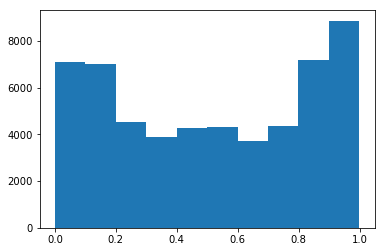

In [15]:
plt.hist(ds_cam["CLDLOW"][0].values.ravel())

In [78]:
ml_precip = (ds["PRECC"] + ds["PRECL"]).mean(axis=0) * 3600 * 24 * 1000
cam_precip = (ds_cam["PRECC"] + ds_cam["PRECL"]).mean(axis=0) * 3600 * 24 * 1000
ml_cam_diff = ml_precip - cam_precip

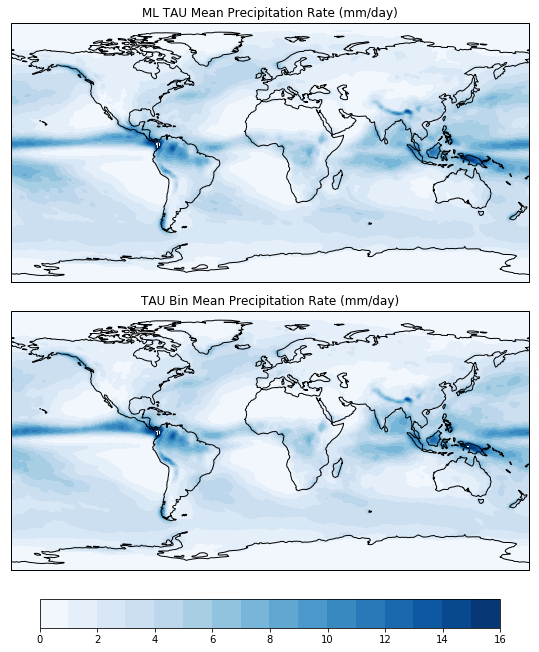

In [164]:
fig = plt.figure(figsize=(8, 8))
ax_cam = plt.axes((0, 0.1, 1, 0.45), projection=ccrs.PlateCarree())
ax_ml = plt.axes((0, 0.6, 1, 0.45), projection=ccrs.PlateCarree())
ax_cbar = plt.axes((0.1, 0, 0.8, 0.05))
cont = ax_cam.contourf(ds_cam["lon"], ds_cam["lat"], cam_precip, np.arange(0, 17), cmap="Blues")
cont = ax_ml.contourf(ds["lon"], ds["lat"], ml_precip, np.arange(0, 17), cmap="Blues")

ax_cam.coastlines()
ax_ml.coastlines()
ax_cam.set_title("TAU Bin Mean Precipitation Rate (mm/day)")
ax_ml.set_title("ML TAU Mean Precipitation Rate (mm/day)")

plt.colorbar(cont, cax=ax_cbar, orientation="horizontal")
plt.savefig("ml_cam_run_precip_comparison.png", dpi=200, bbox_inches="tight")

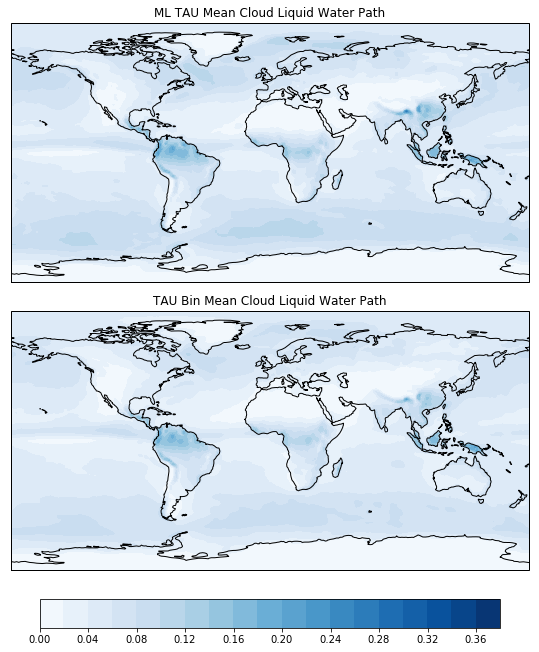

In [195]:
fig = plt.figure(figsize=(8, 8))
ax_cam = plt.axes((0, 0.1, 1, 0.45), projection=ccrs.PlateCarree())
ax_ml = plt.axes((0, 0.6, 1, 0.45), projection=ccrs.PlateCarree())
ax_cbar = plt.axes((0.1, 0, 0.8, 0.05))
cont = ax_cam.contourf(ds_cam["lon"], ds_cam["lat"], ds_cam["TGCLDLWP"].mean(axis=0), np.arange(0, 0.4, 0.02), cmap="Blues")
cont = ax_ml.contourf(ds["lon"], ds["lat"], ds["TGCLDLWP"].mean(axis=0), np.arange(0, 0.4, 0.02), cmap="Blues")

ax_cam.coastlines()
ax_ml.coastlines()
ax_cam.set_title("TAU Bin Mean Cloud Liquid Water Path")
ax_ml.set_title("ML TAU Mean Cloud Liquid Water Path")

plt.colorbar(cont, cax=ax_cbar, orientation="horizontal")
plt.savefig("ml_cam_run_lwp_comparison.png", dpi=200, bbox_inches="tight")

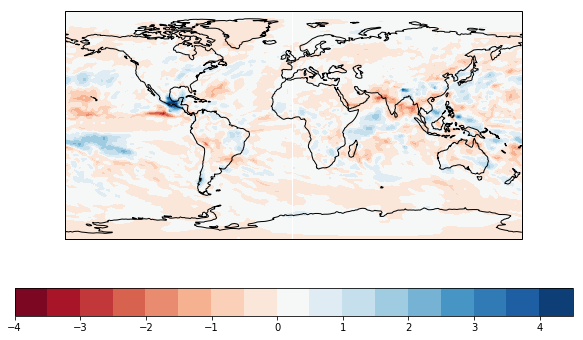

In [109]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
cont = ax.contourf(ds["lon"], ds["lat"], ml_cam_diff, np.arange(-4, 5, 0.5), cmap="RdBu")

ax.coastlines()
plt.colorbar(cont, ax=ax, orientation="horizontal")

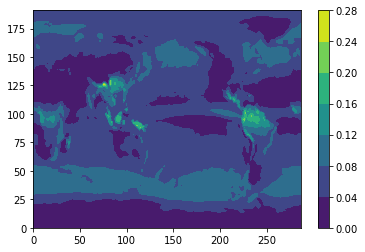

In [188]:
plt.contourf(ds["TGCLDLWP"].mean(axis=0))
plt.colorbar()

In [185]:
ds["TGCLDLWP"]

<xarray.DataArray 'TGCLDLWP' (time: 24, lat: 192, lon: 288)>
dask.array<shape=(24, 192, 288), dtype=float32, chunksize=(1, 192, 288)>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 0001-02-01 00:00:00 ... 0003-01-01 00:00:00
Attributes:
    units:         kg/m2
    long_name:     Total grid-box cloud liquid water path
    cell_methods:  time: mean

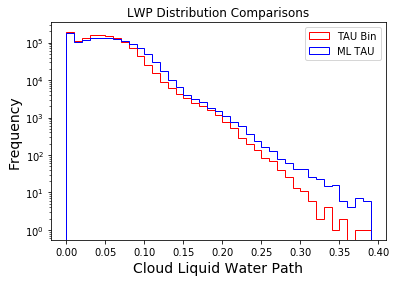

In [199]:
plt.hist(ds_cam["TGCLDLWP"].values.ravel(), bins=np.arange(0, 0.4, 0.01), histtype="step", color="red", label="TAU Bin")
plt.hist(ds["TGCLDLWP"].values.ravel(), bins=np.arange(0, 0.4, 0.01), histtype="step", color="blue", label="ML TAU")
plt.legend(loc=0)
plt.gca().set_yscale("log")
plt.xlabel("Cloud Liquid Water Path", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("LWP Distribution Comparisons")
plt.savefig("cam_run_lwp_hist.png", dpi=200, bbox_inches="tight")

/glade/work/dgagne/ncar_pylib_dl_10/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/glade/work/dgagne/ncar_pylib_dl_10/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


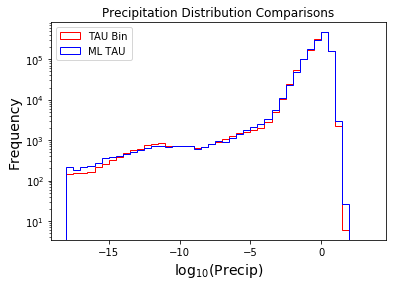

In [181]:
plt.hist(np.log10(ds_cam["PRECL"].values.ravel() * 3600 * 24 * 1000), bins=np.arange(-18, 4, 0.5), histtype="step", color="red", label="TAU Bin")
plt.hist(np.log10(ds["PRECL"].values.ravel() * 3600 * 24 * 1000), bins=np.arange(-18, 4, 0.5), histtype="step", color="blue", label="ML TAU")
plt.legend(loc=2)
plt.gca().set_yscale("log")
plt.xlabel("$\log_{10}$(Precip)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Precipitation Distribution Comparisons")
plt.savefig("cam_run_precip_hist.png", dpi=200, bbox_inches="tight")

In [29]:
ds_cam["PRECC"]

<xarray.DataArray 'PRECC' (time: 24, lat: 192, lon: 288)>
dask.array<shape=(24, 192, 288), dtype=float32, chunksize=(1, 192, 288)>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 0001-02-01 00:00:00 ... 0003-01-01 00:00:00
Attributes:
    units:         m/s
    long_name:     Convective precipitation rate (liq + ice)
    cell_methods:  time: mean

(array([1.0000e+00, 7.0000e+00, 8.0000e+00, 2.5000e+01, 3.3000e+01,
        7.1000e+01, 2.0800e+02, 5.1900e+02, 1.1380e+03, 3.2310e+03,
        1.1712e+04, 2.7770e+04, 6.8740e+03, 2.0500e+03, 8.6700e+02,
        3.7900e+02, 2.3100e+02, 9.4000e+01, 2.6000e+01, 1.0000e+01,
        8.0000e+00, 6.0000e+00, 4.0000e+00, 7.0000e+00, 5.0000e+00,
        4.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([-3.449113  , -3.1434486 , -2.837784  , -2.5321198 , -2.2264552 ,
        -1.9207908 , -1.6151264 , -1.309462  , -1.0037977 , -0.6981332 ,
        -0.39246878, -0.08680436,  0.21886006,  0.52452445,  0.8301889 ,
         1.1358533 ,  1.4415177 ,  1.7471821 ,  2.0528464 ,  2.358511  ,
         2.6641753 ,  2.9698398 ,  3.275504  ,  3.5811687 ,  3.886833  ,
         4.1924973 ,  4.498162  ,  4.8038263 ,  5.109491  ,  5.415155  ,
         5.7208195 ], dtype=float32),
 <a list of 30 Patch objects>)

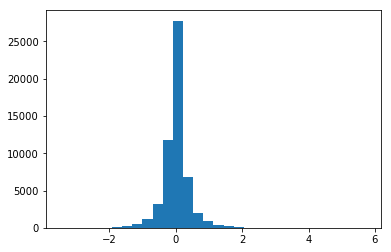

In [111]:
plt.hist(ml_cam_diff.values.ravel(), bins=30)

In [165]:
ml_precip_ts = (ds["PRECC"] + ds["PRECL"]).stack(x=("lon", "lat")).mean(axis=-1) * 3600 * 24 * 1000
cam_precip_ts = (ds_cam["PRECC"] + ds_cam["PRECL"]).stack(x=("lon", "lat")).mean(axis=-1) * 3600 * 24 * 1000

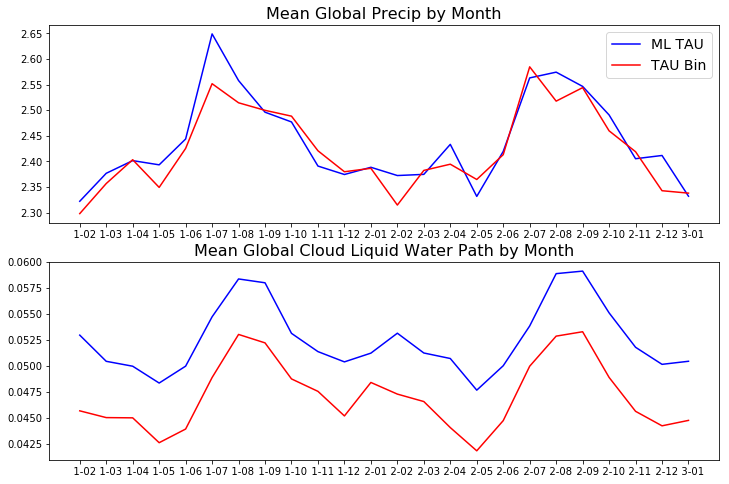

In [215]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot([x.strftime("%Y-%m") for x in ml_precip_ts["time"].values], ml_precip_ts, color="blue", label="ML TAU")
plt.plot([x.strftime("%Y-%m") for x in cam_precip_ts["time"].values], cam_precip_ts, color="red", label="TAU Bin")
plt.title("Mean Global Precip by Month", fontsize=16)
plt.legend(fontsize=14)
plt.subplot(2, 1, 2)
plt.title("Mean Global Cloud Liquid Water Path by Month", fontsize=16)

plt.plot([x.strftime("%Y-%m") for x in ml_precip_ts["time"].values], ds["TGCLDLWP"].stack(x=("lon", "lat")).mean(axis=-1), color="blue", label="ML TAU")
plt.plot([x.strftime("%Y-%m") for x in cam_precip_ts["time"].values], ds_cam["TGCLDLWP"].stack(x=("lon", "lat")).mean(axis=-1), color="red", label="TAU Bin")
plt.savefig("precip_lwp_ts_comp.png", dpi=200, bbox_inches="tight")

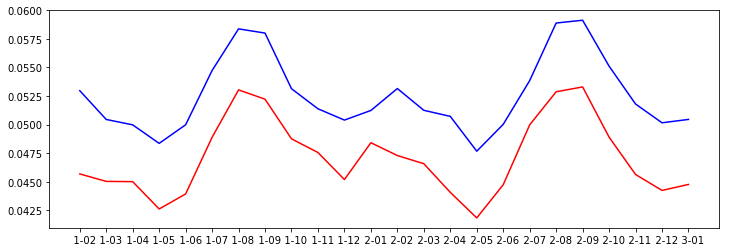

In [208]:
plt.figure(figsize=(12, 4))
plt.plot([x.strftime("%Y-%m") for x in ml_precip_ts["time"].values], ds["TGCLDLWP"].stack(x=("lon", "lat")).mean(axis=-1), color="blue", label="ML TAU")
plt.plot([x.strftime("%Y-%m") for x in cam_precip_ts["time"].values], ds_cam["TGCLDLWP"].stack(x=("lon", "lat")).mean(axis=-1), color="red", label="TAU Bin")

In [134]:
ml_precip_ts["time"].values[0].strftime("%Y-%m-%d")

'   1-02-01'

In [183]:
ds

<xarray.Dataset>
Dimensions:           (ilev: 33, lat: 192, lev: 32, lon: 288, nbnd: 2, time: 24)
Coordinates:
  * lat               (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon               (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lev               (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev              (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time              (time) object 0001-02-01 00:00:00 ... 0003-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    gw                (time, lat) float64 dask.array<shape=(24, 192), chunksize=(1, 192)>
    hyam              (time, lev) float64 dask.array<shape=(24, 32), chunksize=(1, 32)>
    hybm              (time, lev) float64 dask.array<shape=(24, 32), chunksize=(1, 32)>
    P0                (time) float64 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai              (time, ilev) float64 dask.array<shape=(24, 33), chunksize=(1, 33)>
    hybi          